In [281]:
import pandas as pd
import math
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

In [347]:
data = pd.read_csv('data_with_features.csv')
data = data.drop('Unnamed: 0', axis=1)

print(data.shape)
data = data[data['avg_spending_previous_weeks']<300]
data = data[data['previous_amount_spent']<500]
data = data[data['SALES_VALUE']<400]

data = data.sort_values('WEEK_NO')

data = data.dropna().reset_index().drop('index',axis=1)

noise = np.random.normal(0,1,data.shape[0])
noise

data['fake_feature'] = data['SALES_VALUE']/20 + 2*data['var_spending_previous_weeks_real_time']
data['fake_feature2'] = data['SALES_VALUE']/20 + data['var_spending_previous_weeks_real_time']
data['fake_feature3'] = data['SALES_VALUE']/10 - data['previous_amount_spent']
# data['fake_feature3'] = data['SALES_VALUE']/10 + noise


print(data.shape)

(123976, 49)
(31712, 52)


In [348]:
columns_to_predict_on = ['AGE_DESC',
       'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'Adults', 'Child Boolean',
       'Monday %', 'Tuesday %', 'Wednesday %', ' Thursday %', 'Friday %',
       'Saturday %', 'Sunday %', 'morning %', 'afternoon %', 'evening %',
       'avg_visits_per_month', 'avg_visits_per_week', 'weighted_avg',
       'avg_spending_previous_weeks_real_time',
       'std_spending_previous_weeks_real_time',
       'var_spending_previous_weeks_real_time',
       'quan25_spending_previous_weeks_real_time',
       'quan50_spending_previous_weeks_real_time',
       'quan75_spending_previous_weeks_real_time',
       'avg_spending_previous_weeks', 'std_spending_previous_weeks',
       'var_spending_previous_weeks', 'quan25_spending_previous_weeks',
       'quan50_spending_previous_weeks', 'quan75_spending_previous_weeks',
        'last_shopping_day', 'days_since_last_shopping',
       'last_shopping_week', 'weeks_since_last_shopping',
       'amount_spent_last_week', 'previous_amount_spent', 'month', 'season',
       'month_x', 'month_y']


columns_to_predict_on = ['Monday %', 'Tuesday %', 'Wednesday %',
       ' Thursday %', 'Friday %', 'Saturday %', 'Sunday %', 'morning %',
       'afternoon %', 'evening %', 'previous_amount_spent',
         'weeks_since_last_shopping', 'season', 'month_x', 'month_y',
       'avg_visits_per_month', 'avg_visits_per_week', 'weighted_avg',
       'avg_spending_previous_weeks_real_time',
       'std_spending_previous_weeks_real_time',
       'var_spending_previous_weeks_real_time',
       'quan25_spending_previous_weeks_real_time',
       'quan50_spending_previous_weeks_real_time',
       'quan75_spending_previous_weeks_real_time',
       'avg_spending_previous_weeks', 'std_spending_previous_weeks',
       'var_spending_previous_weeks', 'quan25_spending_previous_weeks',
       'quan50_spending_previous_weeks', 'quan75_spending_previous_weeks','fake_feature','fake_feature2'
                         ,'fake_feature3']


In [349]:
data[columns_to_predict_on].head()

,Monday %,Tuesday %,Wednesday %,Thursday %,Friday %,Saturday %,Sunday %,morning %,afternoon %,evening %,...,quan75_spending_previous_weeks_real_time,avg_spending_previous_weeks,std_spending_previous_weeks,var_spending_previous_weeks,quan25_spending_previous_weeks,quan50_spending_previous_weeks,quan75_spending_previous_weeks,fake_feature,fake_feature2,fake_feature3
0,0.103265,0.310681,0.097799,0.080514,0.245383,0.096469,0.065889,0.176688,0.526222,0.297090,...,130.725,204.826667,107.988480,11661.511775,129.26,169.31,265.96,8980.490851,4491.947676,-240.261
1,0.118333,0.117222,0.085000,0.121111,0.173333,0.210000,0.175000,0.101111,0.718889,0.180000,...,73.520,42.318889,48.512509,2353.463511,17.67,26.87,35.49,3362.256314,1681.538907,-164.917
2,0.119642,0.169288,0.126735,0.161887,0.180697,0.079248,0.162504,0.486278,0.493987,0.019735,...,6.595,207.062222,61.908335,3832.641894,156.66,193.42,276.49,125.287579,69.102539,-141.705
3,0.156460,0.199292,0.072566,0.094867,0.093805,0.139469,0.243540,0.159646,0.597876,0.242478,...,86.965,66.221111,23.902262,571.318111,49.89,65.48,75.35,7317.571046,3659.667273,-104.913
4,0.098173,0.120697,0.159796,0.129622,0.150871,0.240119,0.100722,0.135997,0.465363,0.398640,...,0.000,58.655556,47.955188,2299.700078,24.54,24.91,109.12,1602.159600,802.559550,-124.461


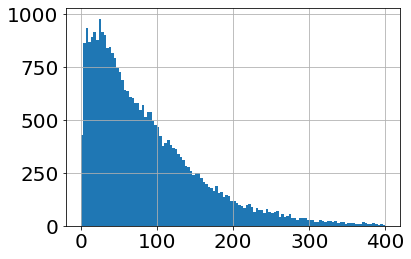

In [350]:
data['SALES_VALUE'].hist(bins=120)

In [351]:
X = data[columns_to_predict_on]

y = data['SALES_VALUE']


In [352]:
#to split randomly split by household_key

In [353]:
X.shape

(31712, 33)

In [354]:
X = pd.get_dummies(X)
# from sklearn.model_selection import TimeSeriesSplit
# tscv = TimeSeriesSplit(n_splits=2,max_train_size=80000)

total_data = X.shape[0]
training_amount = int(total_data*0.8)

X_train = X[:training_amount]
y_train = y[:training_amount]
X_test = X[training_amount:]
y_test = y[training_amount:]

# for train_index, test_index in tscv.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]


# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [355]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [356]:
param = {'max_depth':5, 'eta':0.7, 'booster':'gbtree', 'subsample':0.5,
         'objective':'reg:squarederror','eval_metric':'rmse'}
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round =10
bst = xgb.train(param, dtrain, num_round, evallist)



[0]	eval-rmse:65.0942	train-rmse:61.1968
[1]	eval-rmse:55.9385	train-rmse:52.6791
[2]	eval-rmse:53.7799	train-rmse:50.9303
[3]	eval-rmse:49.3569	train-rmse:46.873
[4]	eval-rmse:47.0749	train-rmse:44.5041
[5]	eval-rmse:43.7856	train-rmse:41.0635
[6]	eval-rmse:41.8497	train-rmse:38.5872
[7]	eval-rmse:40.9385	train-rmse:37.4679
[8]	eval-rmse:39.1597	train-rmse:35.7754
[9]	eval-rmse:38.2692	train-rmse:34.6282


In [357]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

preds = bst.predict(dtest)
mae = mean_absolute_error(y_test, preds)
print('mean absolute error: ' + str(mae))

mse = mean_squared_error(y_test, preds)
rmse = math.sqrt(mse)
print('mean squared error: ' + str(mse))
print('root mean squared error: ' + str(rmse))

r2 = r2_score(y_test, preds) 
print('R2: ' + str(r2))

mean absolute error: 27.310039011033837
mean squared error: 1464.5304172693395
root mean squared error: 38.26918365041694
R2: 0.7290506820059872


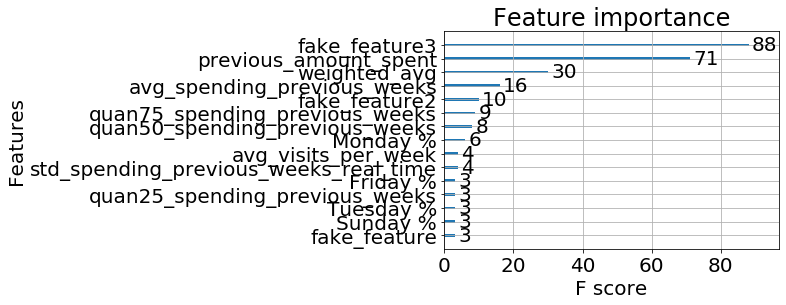

In [358]:
matplotlib.rcParams.update({'font.size': 20})
xgb.plot_importance(bst,max_num_features=15)

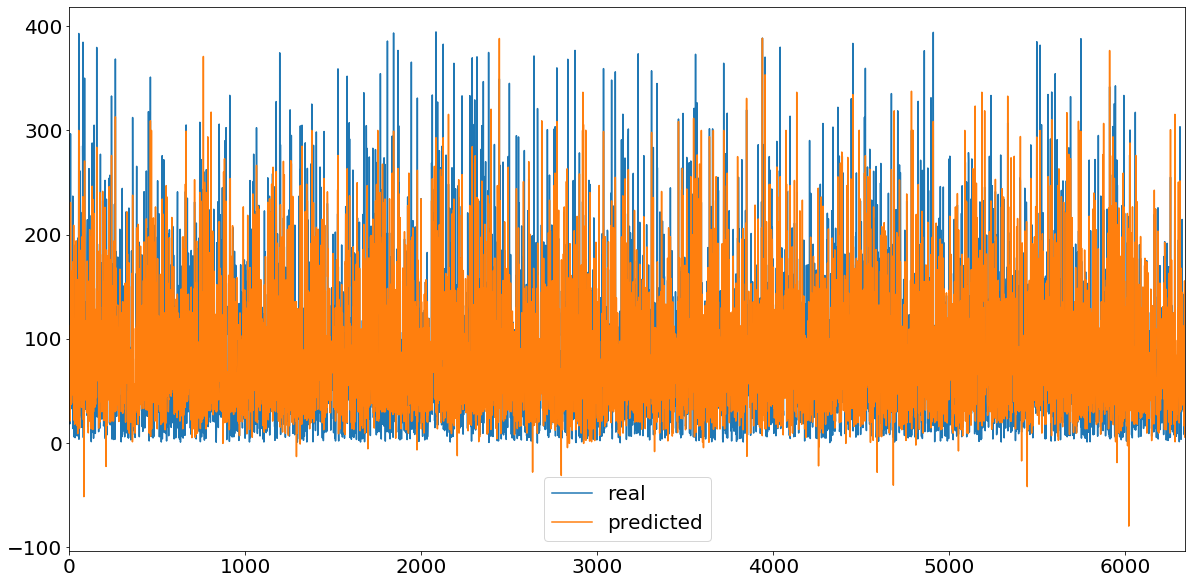

In [359]:
results = pd.DataFrame({ 'real':y_test, 'predicted':preds})#.sort_values(by='real')
results = results.reset_index().drop('index', axis=1)#.head(1000)
results.plot(figsize=(20,10))

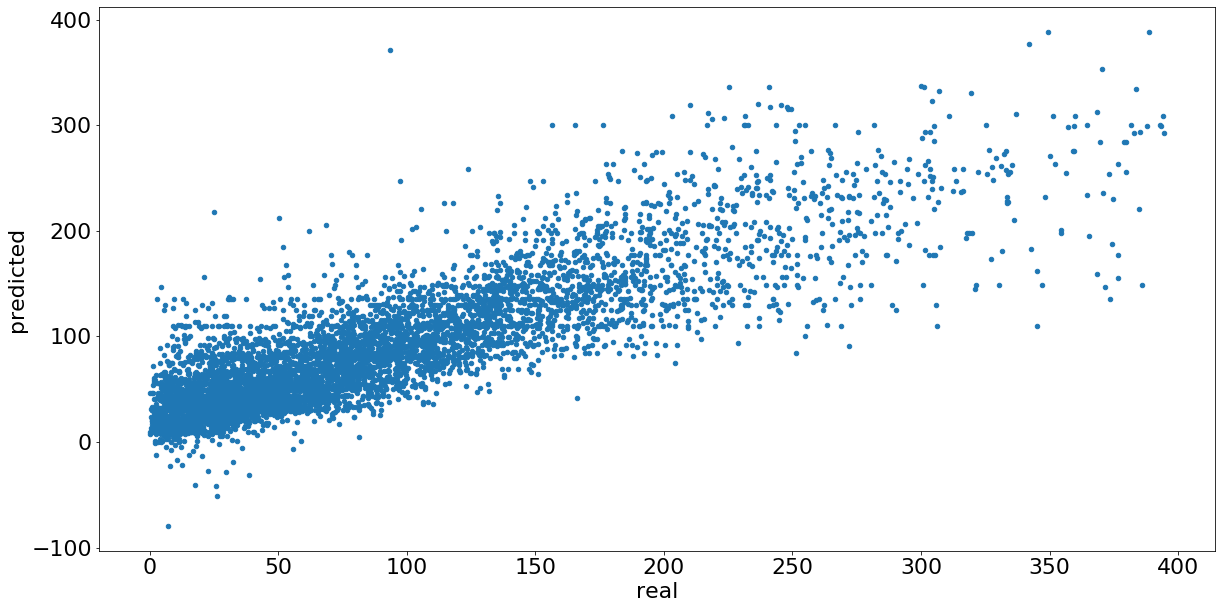

In [360]:
matplotlib.rcParams.update({'font.size': 22})
results.plot(kind='scatter',figsize=(20,10), x='real', y='predicted')